<a href="https://colab.research.google.com/github/Fatemeh-Khosravi/Basket-Analysis-With-Sagemaker/blob/master/Assignment_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1.1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import scipy as sp
import joblib
import os
from nltk.parse.stanford import StanfordParser
#!pip install --user -U nltk
import nltk
import parser
#!pip install stanza
import stanza
from IPython.display import display
#!pip install svgling

## create a vector 
Here we created an array with length = 5 using numpy library . As we can see the type of the vector is numpy.ndarray.

In [ ]:

x = np.array([1, 2, 3, 4, 5])
print(x)
print(type(x))
len(x)

[1 2 3 4 5]
<class 'numpy.ndarray'>


5

## create a matrix
Here we created a 3*3 matrix using a list of values. Each element in the list is a vector which represents a row in the matrix.

In [ ]:
m = np.array([[1, 5, 2] ,[4, 7, 4],[2, 0, 9]])
print(m)
m.shape

[[1 5 2]
 [4 7 4]
 [2 0 9]]


(3, 3)

## Matrix operation
### matrix transpose
If the matrix is m*n then its transpose will be n*m. The component bij in matrix m is equal to the component bji in its transpose.
### matrix determinant
For the squared matrix we can calculate its determinant. If the determinant of the matrix is opposite to zero, then we know that the matrix is invertible so, it is possible to determine the eigenvalues of a matrix. 
### Matrix inverse and identity matrix

Since the determinant of matrix m is opposite to zero, then we can find its inverse so that the product of matrix and its inverse equal to the identity matrix 


In [ ]:
# matrix transpose
print('Matrix Transpose:\n', m.transpose(), '\n')
# matrix determinant
print ('Matrix Determinant:', np.linalg.det(m), '\n')
# matrix inverse
m_inv = np.linalg.inv(m)
print ('Matrix inverse:\n', m_inv, '\n')
# identity matrix (result of matrix x matrix_inverse)
iden_m =  np.dot(m, m_inv)
iden_m = np.round(np.abs(iden_m), 0)
print ('Product of matrix and its inverse:\n', iden_m)


Matrix Transpose:
 [[1 4 2]
 [5 7 0]
 [2 4 9]] 

Matrix Determinant: -105.00000000000006 

Matrix inverse:
 [[-0.6         0.42857143 -0.05714286]
 [ 0.26666667 -0.04761905 -0.03809524]
 [ 0.13333333 -0.0952381   0.12380952]] 

Product of matrix and its inverse:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Eigen Decomposition
It is one of the methods of matrix analysis. It has 2 basic factors: Eigenvalues and Eigenvectors. The matrix must be a squared matrix. Every n*n matrix can have the number of n Eigenvector and the number of n Eigenvalues. The PCA is designed based on the eigen decomposition. In this case, matrix m has 3 eigen values and 3 eigen vectors. Each column in the eigen vectors matrix is an eigen vector.

In [ ]:
# eigendecomposition
m = np.array([[1, 5, 2],
                [4, 7, 4],
                [2, 0, 9]])
 
eigen_vals, eigen_vecs = np.linalg.eig(m)
print('Eigen Values:', eigen_vals, '\n')
print('Eigen Vectors:\n', eigen_vecs)


Eigen Values: [-1.32455532 11.32455532  7.        ] 

Eigen Vectors:
 [[-0.91761521  0.46120352 -0.46829291]
 [ 0.35550789  0.79362022 -0.74926865]
 [ 0.17775394  0.39681011  0.46829291]]


If the matrix m contains real and symmetric elements, then the matrix transpose of m is equal to the matrix m. In this case the eigen vector matrix is invertible and if we calculate the norm of each column in eigenvector matrix, they are equal to one and the inner product of each eigen vector is equal to zero which means these eigen vectors are orthogonal, then: U inverse = U transpose and we have M =U S VT 

In [ ]:
# SVD
m = np.array([[1, 5, 2],
                  [4, 7, 4],
                  [2, 0, 9]])
   
U, S, VT = np.linalg.svd(m)
print('Getting SVD outputs:-\n')
print('U:\n', U, '\n')
print('S:\n', S, '\n')
print('VT:\n', VT, '\n')

Getting SVD outputs:-

U:
 [[ 0.3831556  -0.39279153  0.83600634]
 [ 0.68811254 -0.48239977 -0.54202545]
 [ 0.61619228  0.78294653  0.0854506 ]] 

S:
 [12.10668383  6.91783499  1.25370079] 

VT:
 [[ 0.36079164  0.55610321  0.74871798]
 [-0.10935467 -0.7720271   0.62611158]
 [-0.92621323  0.30777163  0.21772844]] 



## Statistic
Here we generated 15 random integer numbers between 1 and 20 then with SciPy library then we got some descriptive statistic like mean , median , mode etc.

In [ ]:
# descriptive statistics
# get data
nums = np.random.randint(1,20, size=(1,15))[0]
print('Data: ', nums)
# get descriptive stats
print ('Mean:', sp.mean(nums))
print ('Median:', sp.median(nums))
print ('Mode:', sp.stats.mode(nums))
print ('Standard Deviation:', sp.std(nums))
print ('Variance:', sp.var(nums))
print ('Skew:', sp.stats.skew(nums))
print ('Kurtosis:', sp.stats.kurtosis(nums))

  

Data:  [16 11  7 17 11  7 13 11 14 16  9 12 14  9  3]
Mean: 11.333333333333334
Median: 11.0
Mode: ModeResult(mode=array([11]), count=array([3]))
Standard Deviation: 3.7535168694024663
Variance: 14.088888888888892
Skew: -0.4272193891250856
Kurtosis: -0.4220312671038631


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  # Remove the CWD from sys.path while we load stuff.


## Natural Language Processing
Using nltk and StanforParser libraries we analyze the sample text, we applied some basic NLP operations on textual data where we annotate a document (text sentence) with various components like parts of speech, phrase level tags, and so on based on its constituent grammar. For example, the only verb in this sentence is 'jump' and as we can see in the graph it is assigned as 'VBZ'.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(ROOT
  (S
    (NP (DT The) (JJ quick) (JJ brown) (NN fox))
    (VP (VBZ jumps) (PP (IN over) (NP (DT the) (JJ lazy) (NN dog))))))


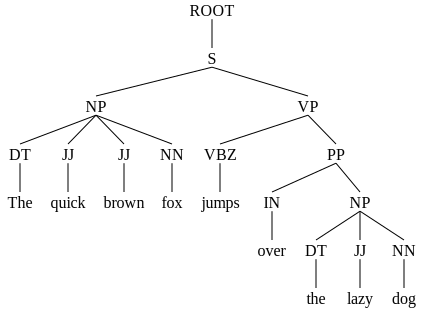

In [ ]:
sentence = 'The quick brown fox jumps over the lazy dog'
# create parser object
scp = StanfordParser(path_to_jar='/content/stanford-parser.jar',path_to_models_jar='/content/stanford-parser-4.2.0-models.jar')



# get parse tree
result = list(scp.raw_parse(sentence))
tree = result[0]

#print the constituency parse tree
print(tree)

# visualize constituency parse tree
display(tree)


## Predicting Student Grant Recommendations

Here we call the 'student_records.csv' file as 'df'. With head() we can see the first five rows of the dataframe. Then we defined features and outcome lables for the training phase and modeling.

In [ ]:
df=pd.read_csv('student_records.csv')

In [ ]:
df.head()

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No


In [ ]:
# get features and corresponding outcomes
feature_names = ['OverallGrade', 'Obedient', 'ResearchScore',
                         'ProjectScore']
training_features = df[feature_names]
outcome_name = ['Recommend']
outcome_labels = df[outcome_name]


In [ ]:
# view features
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [ ]:
df.shape

(8, 6)

In [ ]:
# view outcome labels
outcome_labels


,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


Most of machine learning algorithms need to have a numeric features in the format of scaling or centering, so here we scaled all numeric variables using StandardScaler() function .(Mean = 0 and standard deviation = 1).

In [ ]:
# list down features based on type
numeric_feature_names = ['ResearchScore', 'ProjectScore']
categoricial_feature_names = ['OverallGrade', 'Obedient']

In [ ]:
ss=StandardScaler()

In [ ]:
# fit scaler on numeric features
ss.fit(training_features[numeric_feature_names])

StandardScaler()

In [ ]:
# scale numeric features now
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
 # view updated featureset
training_features


,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,0.899583,1.376650
1,C,N,0.730648,-0.091777
2,F,N,-1.803390,-1.560203
3,B,Y,0.392776,0.772004
4,E,N,-1.465519,-0.998746
5,A,Y,0.967158,1.117516
6,B,Y,-0.114032,0.253735
7,C,Y,0.392776,-0.869179


We need to handle categorical variables to numeric version using one hot encoding feature extraction technique with get_dummies() function .

In [ ]:
training_features = pd.get_dummies(training_features,columns=categoricial_feature_names)

In [ ]:
# view newly engineering features
training_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_B,OverallGrade_C,OverallGrade_E,OverallGrade_F,Obedient_N,Obedient_Y
0,0.899583,1.376650,1,0,0,0,0,0,1
1,0.730648,-0.091777,0,0,1,0,0,1,0
2,-1.803390,-1.560203,0,0,0,0,1,1,0
3,0.392776,0.772004,0,1,0,0,0,0,1
4,-1.465519,-0.998746,0,0,0,1,0,1,0
5,0.967158,1.117516,1,0,0,0,0,0,1
6,-0.114032,0.253735,0,1,0,0,0,0,1
7,0.392776,-0.869179,0,0,1,0,0,0,1


In [ ]:
# get list of new categorical features
categorical_engineered_features = list(set(training_features.columns) -
                                                 set(numeric_feature_names))
categorical_engineered_features

['OverallGrade_F',
 'OverallGrade_E',
 'Obedient_Y',
 'OverallGrade_A',
 'OverallGrade_B',
 'Obedient_N',
 'OverallGrade_C']

## descriptive statistics 
As we can see after scaling the data , the numerical variable (ResearchScore) has the mean of 0 and standard deviation of 1.

In [ ]:
print ('Mean:', sp.mean(training_features['ResearchScore']))
print ('Median:', sp.median(training_features['ResearchScore']))
print ('Mode:', sp.stats.mode(training_features['ResearchScore']))
print ('Standard Deviation:', sp.std(training_features['ResearchScore']))
print ('Variance:', sp.var(training_features['ResearchScore']))
print ('Skew:', sp.stats.skew(training_features['ResearchScore']))
print ('Kurtosis:', sp.stats.kurtosis(training_features['ResearchScore']))

Mean: -1.3877787807814457e-17
Median: 0.392775854134249
Mode: ModeResult(mode=array([0.39277585]), count=array([2]))
Standard Deviation: 1.0
Variance: 1.0
Skew: -0.8587690962045245
Kurtosis: -0.8684592571959291


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  """


## Modeling

Here we fit the model using LogisticRegression()function. This function accept one argument as training features (X) and one argument as labels or outcome for learning phase. 

In [ ]:
# fit the model
lr = LogisticRegression()
model = lr.fit(training_features,
                       np.array(outcome_labels['Recommend']))


## Model Evaluation
Using predict () function we predict the output of the data. Then with accuracy_score () function we can see the percentage of items which they are correctly predicted. This function accepts two arguments, the first argument is the actual label, and the second argument is the predicted label. The accuracy of the model is 100% and the overfitting occurred.

In [ ]:
# simple evaluation on training data
pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])

In [ ]:
print('Accuracy:', float(accuracy_score(actual_labels,
                pred_labels))*100, '%')

Accuracy: 100.0 %


Using classification_report() function we have different metrics like precession, recall, f1 score etc.

In [ ]:
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))


Classification Stats:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## Model Deployment

we need to save our trained model to use it in the future, so we save the scaler object and the model using the following path with the format of '.pickle'.

In [ ]:
# save models to be deployed on your server
if not os.path.exists('Model'):
    os.mkdir('Model')
if not os.path.exists('Scaler'):
    os.mkdir('Scaler')
joblib.dump(model, r'Model/model.pickle')
joblib.dump(ss, r'Scaler/scaler.pickle')

['Scaler/scaler.pickle']

## Prediction in Action

In [ ]:
# load model and scaler objects
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')

Now we predict the new data, first we need to prepare the sample and applying one hot encoding and scaling the data. The input data should be in the format of data frame. And we should add missing categorical feature columns and impute the missing values related to the variables in the training dataset. 

In [ ]:
## data retrieval
new_data = pd.DataFrame([{'Name': 'Nathan', 'OverallGrade': 'F',
                   'Obedient': 'N', 'ResearchScore': 30, 'ProjectScore': 20},                        {'Name': 'Thomas', 'OverallGrade': 'A',
                   'Obedient': 'Y', 'ResearchScore': 78, 'ProjectScore': 80}])
new_data = new_data[['Name', 'OverallGrade', 'Obedient',
                              'ResearchScore', 'ProjectScore']]
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore
0,Nathan,F,N,30,20
1,Thomas,A,Y,78,80


In [ ]:
## data preparation
prediction_features = new_data[feature_names]

# scaling
prediction_features[numeric_feature_names] =scaler.transform(prediction_features[numeric_feature_names])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
# engineering categorical variables
prediction_features = pd.get_dummies(prediction_features,columns=categoricial_feature_names)

# view feature set
prediction_features


,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y
0,-1.127647,-1.430636,0,1,1,0
1,0.494137,1.160705,1,0,0,1


In [ ]:
# add missing categorical feature columns
current_categorical_engineered_features =set(prediction_features.columns) - set(numeric_feature_names)
missing_features = set(categorical_engineered_features) -current_categorical_engineered_features
for feature in missing_features:
 # add zeros since feature is absent in these data samples
    prediction_features[feature] = [0]* len(prediction_features)
    # view final feature set
prediction_features

,ResearchScore,ProjectScore,OverallGrade_A,OverallGrade_F,Obedient_N,Obedient_Y,OverallGrade_E,OverallGrade_B,OverallGrade_C
0,-1.127647,-1.430636,0,1,1,0,0,0,0
1,0.494137,1.160705,1,0,0,1,0,0,0


After preparing the samples we pass both instances to the trained model to see the predicted labels. 

In [ ]:
## predict using model
predictions = model.predict(prediction_features)
## display results
new_data['Recommend'] = predictions
#new_data
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array(['No', 'Yes'], dtype=object)